Notebook Abgabe Data Science Neu

    
    Preprocessing

In [1]:
import kagglehub
from pathlib import Path
# Download latest version 
path = Path(kagglehub.dataset_download("ranadeep/credit-risk-dataset"))
path = path / "loan" / "loan.csv"
assert path.exists()
assert path.is_file()
print("Downloaded dataset to path:", path)

c:\Users\timse\Documents\DHBW_ENV\Data_Science_Basic\DS_S1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 101M/101M [00:10<00:00, 10.4MB/s] 

Extracting files...


Downloaded dataset to path: C:\Users\timse\.cache\kagglehub\datasets\ranadeep\credit-risk-dataset\versions\3\loan\loan.csv


x

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
import sklearn as skl
from sklearn.preprocessing import LabelEncoder
#lese CSV ein
df = pd.read_csv(path)
# Schwellenwert für fehlende Werte berechnen (größer 10%)
threshold = len(df) * 0.9
# Spalten entfernen, in denen mehr als 10% der Werte fehlen
df = df.dropna(axis=1, thresh=threshold)
#entferne ID und memeber ID
df = df.drop(columns=['id', 'member_id','emp_title','title','url','addr_state','grade'])
#ersetze fehlende werte in Spalte tot_coll_amt mit 0
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)
#ersetze fehlende werte in Spalte total_rev_hi_lim mit 0
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(0)
#alle missingvalues von tot_cur_bal mit dem durchschnitt ersetzten
mean_tot_cur_bal = df['tot_cur_bal'].mean()
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(mean_tot_cur_bal)
#ersetze fehlende werte in Spalte pub_rec mit 0
df['pub_rec'] = df['pub_rec'].fillna(0)
#ersetze fehlende werte in Spalte open_acc mit 0
df['open_acc'] = df['open_acc'].fillna(0)
#ersetze fehlende werte in Spalte inq_last_6mths mit 0
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(0)
#ersetze fehlende werte in Spalte delinq_2yrs mit 0
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)
# Zahlen aus der Spalte earliest_cr_line isolieren Mean bilden und fehlende werte ersetzten
# Datumswerte konvertieren und formatieren 
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='mixed') 
df['earliest_cr_line'] = df['earliest_cr_line'].dt.strftime('%m.%Y')
#alle missingvalues von tot_cur_bal mit dem durchschnitt ersetzten
mean_annual_inc = df['annual_inc'].mean()
df['annual_inc'] = df['annual_inc'].fillna(mean_annual_inc)
#ersetze fehlende werte in Spalte inq_last_6mths mit 0
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(0)
#entferne joined kredite
df = df[~df['application_type'].str.contains('JOINT')]
#dadurch da nun alle nur application sind entferne ich die spalte
df = df.drop(columns=['application_type'])
# transform emp_length to numeric
mapping_emp = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
df['emp_length'] = df['emp_length'].map(mapping_emp)
mean_emp_length = df['emp_length'].mean()
df['emp_length'] = df['emp_length'].fillna(mean_emp_length)
print('Missing: ', df['emp_length'].isnull().mean())
#homeownership mit onehotencoding
#df = pd.get_dummies(df, columns=['home_ownership'], drop_first=False)
label_encoder = LabelEncoder() 
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
#alle missingvalues von revol_util mit dem durchschnitt ersetzten
mean_revol_util = df['revol_util'].mean()
df['revol_util'] = df['revol_util'].fillna(mean_revol_util)
#alle missingvalues von total_acc mit dem durchschnitt ersetzten
mean_total_acc = df['total_acc'].mean()
df['total_acc'] = df['total_acc'].fillna(mean_total_acc)
#onehotencoding paymentplan
df = pd.get_dummies(df, columns=['pymnt_plan'], drop_first=False)
#loanstatus labelncoding
mapping_loan_status = {
 'Fully Paid':1, 'Charged Off':0, 'Current':1, 'Default':0, 'Late (31-120 days)':0,
 'In Grace Period':0, 'Late (16-30 days)':0,
 'Does not meet the credit policy. Status:Fully Paid':0,
 'Does not meet the credit policy. Status:Charged Off':0, 'Issued':0
}
df['loan_status'] = df['loan_status'].map(mapping_loan_status)
#onehotencoding term
df = pd.get_dummies(df, columns=['term'], drop_first=False)
#onehotencoding purpose
df = pd.get_dummies(df, columns=['purpose'], drop_first=False)
#entferne alle Buchstaben zipcode
df['zip_code'] = df['zip_code'].str.replace(r'[a-zA-Z]', '', regex=True)
#umwandlung in zahlenwerte issue_date
df['issue_d'] = pd.to_datetime(df['issue_d'], format='mixed') 
df['issue_d'] = df['issue_d'].dt.strftime('%m.%Y')
#umwandlung in zahlenwerte last_pymnt_d
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='mixed') 
df['last_pymnt_d'] = df['last_pymnt_d'].dt.strftime('%m.%Y')
#umwandlung in zahlenwerte last_pymnt_d
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='mixed') 
df['last_credit_pull_d'] = df['last_credit_pull_d'].dt.strftime('%m.%Y')
#onehotencoding subgrade
#df = pd.get_dummies(df, columns=['sub_grade'], drop_first=False)
label_encoder = LabelEncoder() 
df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])
#onehotencoding initial_list_status
df = pd.get_dummies(df, columns=['initial_list_status'], drop_first=False)
#print(df.head())initial_list_status

C:\Users\timse\AppData\Local\Temp\ipykernel_10440\1155558311.py:8: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Missing:  0.0


In [16]:
import pandas as pd
#df_ = pd.read_csv('loan.csv')
#status = df['loan_status'].unique
print(df['loan_status'].unique())

[1 0]


In [1]:
import matplotlib.pyplot as plt 
import pandas as p
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from sklearn.metrics import classification_report

# CSV-Daten einlesen
df = pd.read_csv('loan.csv')

# Datenbereinigung und -vorbereitung (dein vorheriger Code)
threshold = len(df) * 0.9
df = df.dropna(axis=1, thresh=threshold)
df = df.drop(columns=['id', 'member_id','emp_title','title','url','addr_state','grade'])
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(0)
mean_tot_cur_bal = df['tot_cur_bal'].median()
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(mean_tot_cur_bal)
df['pub_rec'] = df['pub_rec'].fillna(0)
df['open_acc'] = df['open_acc'].fillna(0)
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(0)
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='mixed')
df['earliest_cr_line'] = df['earliest_cr_line'].dt.strftime('%m.%Y')
mean_annual_inc = df['annual_inc'].median()
df['annual_inc'] = df['annual_inc'].fillna(mean_annual_inc)
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(0)
df = df[~df['application_type'].str.contains('JOINT')]
df = df.drop(columns=['application_type'])
mapping_emp = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}
df['emp_length'] = df['emp_length'].map(mapping_emp)
mean_emp_length = df['emp_length'].median()
df['emp_length'] = df['emp_length'].fillna(mean_emp_length)
label_encoder = LabelEncoder() 
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
mean_revol_util = df['revol_util'].median()
df['revol_util'] = df['revol_util'].fillna(mean_revol_util)
mean_total_acc = df['total_acc'].median()
df['total_acc'] = df['total_acc'].fillna(mean_total_acc)
df = pd.get_dummies(df, columns=['pymnt_plan'], drop_first=False)
mapping_loan_status = {'Fully Paid':1, 'Charged Off':0, 'Current':1, 'Default':0, 'Late (31-120 days)':0, 'In Grace Period':0, 'Late (16-30 days)':0, 'Does not meet the credit policy. Status:Fully Paid':0, 'Does not meet the credit policy. Status:Charged Off':0, 'Issued':0}
df['loan_status'] = df['loan_status'].map(mapping_loan_status)
df = pd.get_dummies(df, columns=['term'], drop_first=False)
df = pd.get_dummies(df, columns=['purpose'], drop_first=False)
df['zip_code'] = df['zip_code'].str.replace(r'[a-zA-Z]', '', regex=True)
df['issue_d'] = pd.to_datetime(df['issue_d'], format='mixed')
df['issue_d'] = df['issue_d'].dt.strftime('%m.%Y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='mixed')
df['last_pymnt_d'] = df['last_pymnt_d'].dt.strftime('%m.%Y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='mixed')
df['last_credit_pull_d'] = df['last_credit_pull_d'].dt.strftime('%m.%Y')
label_encoder = LabelEncoder() 
df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])
df['verification_status'] = label_encoder.fit_transform(df['verification_status'])
df = pd.get_dummies(df, columns=['initial_list_status'], drop_first=False)
# Merkmale (Features) und Zielvariable (Target) definieren
X = df.drop(columns=['loan_status'])
y = df['loan_status']
#from sklearn import clf
# Feature Importances extrahieren
#importances = clf.feature_importances_
#indices = np.argsort(importances)[::-1]

# Merkmale sortieren
#features = X.columns

# Visualisierung der Feature Importances
#

# Daten in Trainings- und Testset aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Klassifikator erstellen und trainieren
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Vorhersagen auf dem Testset treffen
y_pred = clf.predict(X_test)

# Genauigkeit der Vorhersagen bewerten
accuracy = accuracy_score(y_test, y_pred)
print(f"\nGenauigkeit des Random Forest Klassifikators: {accuracy:.2f}")
# Matplotlib Font-Einstellungen ändern 
plt.rcParams.update({'font.size': 14, 'font.family': 'serif', 'font.serif': ['Times New Roman']})
# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Wahre Klasse')
plt.show()

# Vorhersagen auf dem Trainings- und Testset treffen
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Genauigkeit der Vorhersagen bewerten
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"\nGenauigkeit des Random Forest Klassifikators - Training: {accuracy_train:.2f}")
print(f"Genauigkeit des Random Forest Klassifikators - Test: {accuracy_test:.2f}")



report = classification_report(y_test, y_pred)
print(report)
#macro_avg = classification_report['macro avg']
#print(macro_avg)
# Merkmalswichtigkeit extrahieren 
importances = clf.feature_importances_ 
feature_names = X.columns 
# Visualisierung der Merkmalswichtigkeit 
indices = np.argsort(importances)[::-1] 
# Sortiere die Merkmale nach ihrer Wichtigkeit  
# #Filtere die Merkmale heraus, die weniger als 4% wichtig sind 
threshold = 0.04 
filtered_indices = [i for i in indices if importances[i] >= threshold]
  # Setze die untere Grenze auf 1% und obere Grenze etwas höher als der maximale Wert
# Sortiere die Merkmale nach ihrer Wichtigkeit 
plt.figure(figsize=(10, 6)) 
plt.title('Wichtigkeit der Merkmale') 
plt.bar(range(len(filtered_indices)), importances[filtered_indices], align='center', color='r')
plt.xticks(range(len(filtered_indices)), feature_names[filtered_indices], rotation=90)
plt.xlabel('Merkmale') 
plt.ylabel('Wichtigkeit') 
plt.show()

# Balkendiagramm für die Genauigkeit erstellen
#
#from sklearn.metrics import roc_curve, auc
# # ROC-Kurve Visualisieren
# fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('V12')
# #lernkurve
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure(figsize=(8, 6))
# plt.plot(train_sizes, train_scores_mean, 'o-', color='red', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='blue', label='Cross-validation score')
# plt.xlabel('Training examples')
# plt.ylabel('Score')
# plt.title('Learning Curves')
# plt.legend(loc='best')
# plt.show()
# #plottree
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20, 10))
# plot_tree(clf.estimators_[0], filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True, proportion=True)
# plt.show()
# import seaborn as sns
# # Sample DataFrame with fewer rows for easier visualization
# sample_df = df.sample(n=500, random_state=42)
# sns.pairplot(sample_df, hue='loan_status')
# plt.show()



ModuleNotFoundError: No module named 'matplotlib'

NameError: name 'pd' is not defined

C:\Users\timse\AppData\Local\Temp\ipykernel_21192\3743953723.py:7: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


Genauigkeit des DummyClassifiers: 0.91


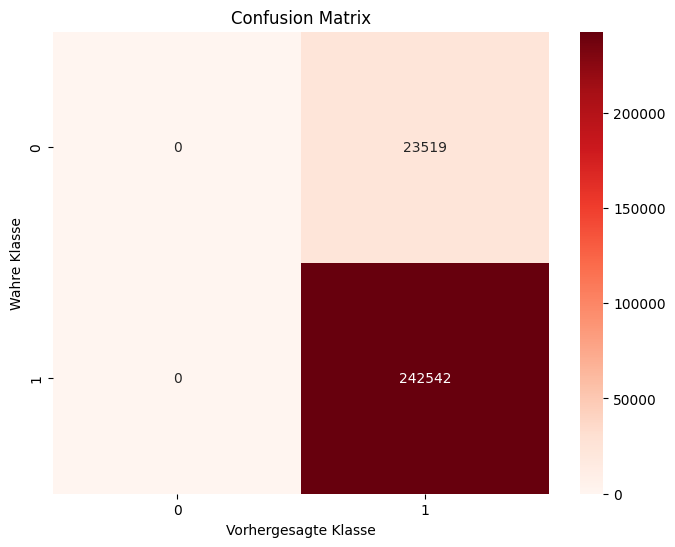


Genauigkeit des Random Forest Klassifikators - Training: 1.00
Genauigkeit des Random Forest Klassifikators - Test: 0.98


c:\Users\timse\Documents\DHBW_ENV\Data_Science_Basic\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\timse\Documents\DHBW_ENV\Data_Science_Basic\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23519
           1       0.91      1.00      0.95    242542

    accuracy                           0.91    266061
   macro avg       0.46      0.50      0.48    266061
weighted avg       0.83      0.91      0.87    266061



c:\Users\timse\Documents\DHBW_ENV\Data_Science_Basic\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TypeError: string indices must be integers, not 'str'

C:\Users\timse\AppData\Local\Temp\ipykernel_10896\3207471715.py:7: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


Genauigkeit des DummyClassifiers: 0.91


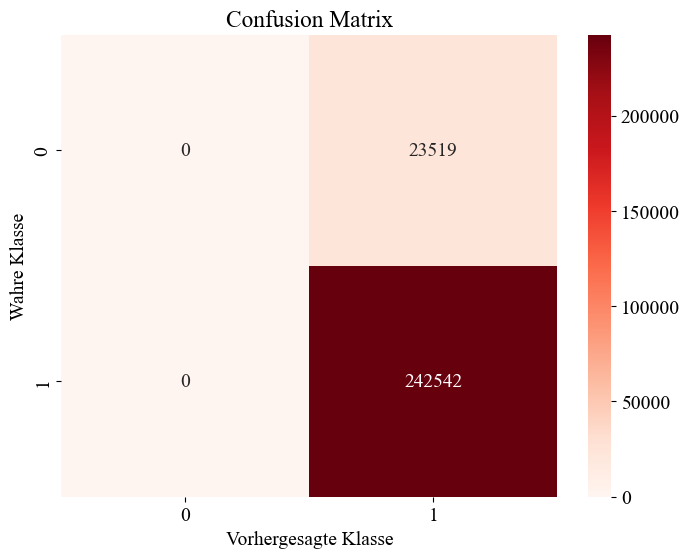


Genauigkeit des Random Forest Klassifikators - Training: 1.00
Genauigkeit des Random Forest Klassifikators - Test: 0.98
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23519
           1       0.91      1.00      0.95    242542

    accuracy                           0.91    266061
   macro avg       0.46      0.50      0.48    266061
weighted avg       0.83      0.91      0.87    266061



c:\Users\timse\Documents\DHBW_ENV\Data_Science_Basic\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\timse\Documents\DHBW_ENV\Data_Science_Basic\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\timse\Documents\DHBW_ENV\Data_Science_Basic\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

TypeError: string indices must be integers, not 'str'

In [ ]:
#Dummy Classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# CSV-Daten einlesen
df = pd.read_csv('loan.csv')
# Datenbereinigung und -vorbereitung (dein vorheriger Code)
threshold = len(df) * 0.9
df = df.dropna(axis=1, thresh=threshold)
df = df.drop(columns=['id', 'member_id','emp_title','title','url','addr_state','grade'])
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(0)
mean_tot_cur_bal = df['tot_cur_bal'].median()
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(mean_tot_cur_bal)
df['pub_rec'] = df['pub_rec'].fillna(0)
df['open_acc'] = df['open_acc'].fillna(0)
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(0)
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='mixed')
df['earliest_cr_line'] = df['earliest_cr_line'].dt.strftime('%m.%Y')
mean_annual_inc = df['annual_inc'].median()
df['annual_inc'] = df['annual_inc'].fillna(mean_annual_inc)
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(0)
df = df[~df['application_type'].str.contains('JOINT')]
df = df.drop(columns=['application_type'])
mapping_emp = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}
df['emp_length'] = df['emp_length'].map(mapping_emp)
mean_emp_length = df['emp_length'].median()
df['emp_length'] = df['emp_length'].fillna(mean_emp_length)
label_encoder = LabelEncoder() 
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
mean_revol_util = df['revol_util'].median()
df['revol_util'] = df['revol_util'].fillna(mean_revol_util)
mean_total_acc = df['total_acc'].median()
df['total_acc'] = df['total_acc'].fillna(mean_total_acc)
df = pd.get_dummies(df, columns=['pymnt_plan'], drop_first=False)
mapping_loan_status = {'Fully Paid':1, 'Charged Off':0, 'Current':1, 'Default':0, 'Late (31-120 days)':0, 'In Grace Period':0, 'Late (16-30 days)':0, 'Does not meet the credit policy. Status:Fully Paid':0, 'Does not meet the credit policy. Status:Charged Off':0, 'Issued':0}
df['loan_status'] = df['loan_status'].map(mapping_loan_status)
df = pd.get_dummies(df, columns=['term'], drop_first=False)
df = pd.get_dummies(df, columns=['purpose'], drop_first=False)
df['zip_code'] = df['zip_code'].str.replace(r'[a-zA-Z]', '', regex=True)
df['issue_d'] = pd.to_datetime(df['issue_d'], format='mixed')
df['issue_d'] = df['issue_d'].dt.strftime('%m.%Y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='mixed')
df['last_pymnt_d'] = df['last_pymnt_d'].dt.strftime('%m.%Y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='mixed')
df['last_credit_pull_d'] = df['last_credit_pull_d'].dt.strftime('%m.%Y')
label_encoder = LabelEncoder() 
df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])
df['verification_status'] = label_encoder.fit_transform(df['verification_status'])
df = pd.get_dummies(df, columns=['initial_list_status'], drop_first=False)

# Merkmale (Features) und Zielvariable (Target) definieren
X = df.drop(columns=['loan_status'])
y = df['loan_status']


# Daten in Trainings- und Testset aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# DummyClassifier erstellen und trainieren
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Vorhersagen auf dem Testset treffen
y_pred = dummy_clf.predict(X_test)

# Genauigkeit der Vorhersagen bewerten
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit des DummyClassifiers: {accuracy:.2f}")

# Confusion Matrix berechnen und anzeigen
cm = confusion_matrix(y_test, y_pred)
# Visualisierung der Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Wahre Klasse')
plt.show()

# Vorhersagen auf dem Trainings- und Testset treffen
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Genauigkeit der Vorhersagen bewerten
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"\nGenauigkeit des Random Forest Klassifikators - Training: {accuracy_train:.2f}")
print(f"Genauigkeit des Random Forest Klassifikators - Test: {accuracy_test:.2f}")

report = classification_report(y_test, y_pred)
print(report)
macro_avg = report['macro avg']
# Balkendiagramm für die Genauigkeit erstellen
labels = ['Training', 'Test', 'F1 Score']
accuracies = [accuracy_train, macro_avg]
colors = ['#67000D', '#DF2C26','#FEE5D9']  # Rot für Training, Gelb für Test

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracies, color=colors)
#plt.ylim(0, 1)  # Skala der y-Achse von 0 bis 1
# Werte über die Balken hinzufügen
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

plt.xlabel('Datensatz')
plt.ylabel('Genauigkeit')
plt.title('Genauigkeit des Random Forest Modells für Trainings- und Testdaten')
plt.show()

C:\Users\timse\AppData\Local\Temp\ipykernel_10896\3784796427.py:18: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


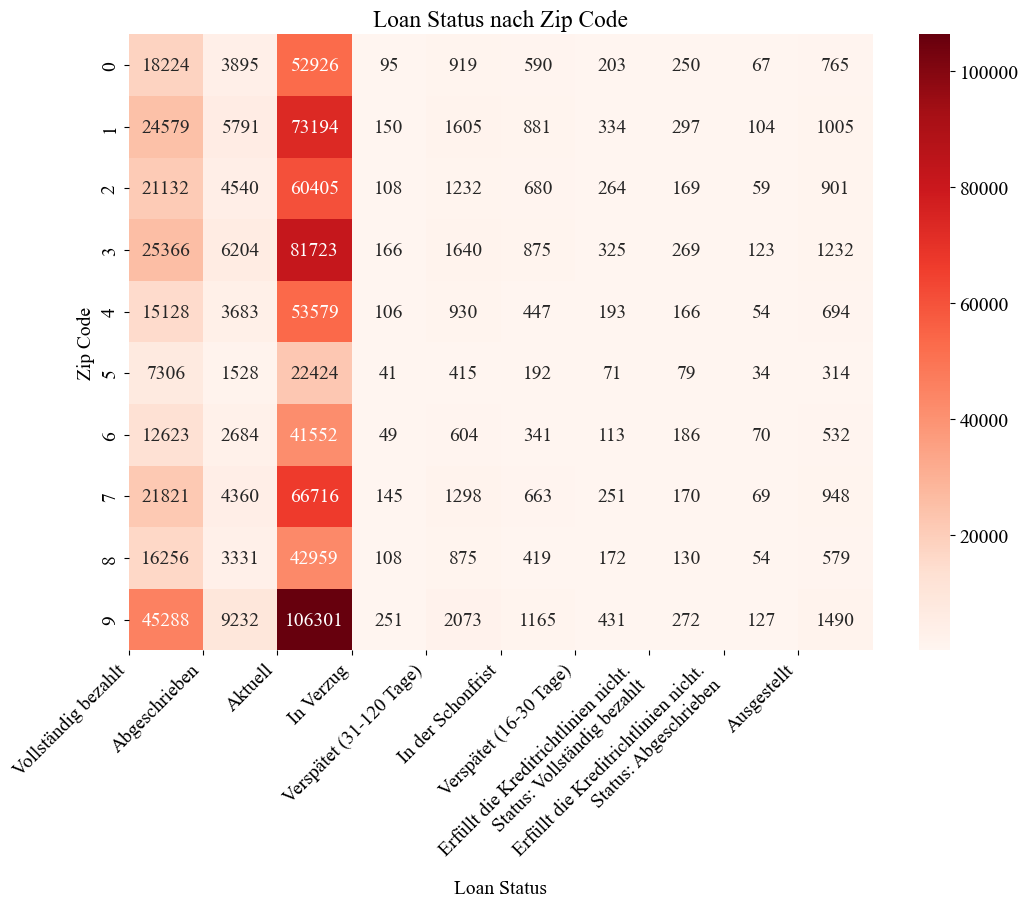

   loan_status zip_code
0            1        8
1            2        3
2            1        6
3            1        9
4            3        9


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import pivot_table
import re


# Funktion zum Extrahieren der ersten Zahl
def extract_first_number(text):
    match = re.search(r'\d+', text)
    return int(match.group()) if match else None
def extract_first_digit(text): 
    match = re.search(r'\d', text) 
    return match.group() if match else None
#schriftart ändern
plt.rcParams.update({'font.size': 14, 'font.family': 'serif', 'font.serif': ['Times New Roman']})
# CSV-Daten einlesen
df = pd.read_csv('loan.csv')
df['zip_code'] = df['zip_code'].apply(extract_first_digit)
#loanstatus labelncoding
mapping_loan_status = {
 'Fully Paid':1, 'Charged Off':2, 'Current':3, 'Default':4, 'Late (31-120 days)':5,
 'In Grace Period':6, 'Late (16-30 days)':7,
 'Does not meet the credit policy. Status:Fully Paid':8,
 'Does not meet the credit policy. Status:Charged Off':9, 'Issued':10
}
df['loan_status'] = df['loan_status'].map(mapping_loan_status)
 

# Nur relevante Spalten auswählen
df = df[['loan_status', 'zip_code']]

# Fehlende Werte entfernen
#df = df.dropna()
# Fehlende Werte entfernen 
df = df.dropna(subset=['loan_status', 'zip_code']) 
# Loan Status und Zip Code zählen 
pivot_table = df.groupby(['zip_code', 'loan_status']).size().unstack(fill_value=0)
# Heatmap erstellen
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Reds', cbar=True)
# Selbstbestimmte Strings für die Achsen 
x_labels = ['Vollständig bezahlt', 'Abgeschrieben', 'Aktuell', 'In Verzug', 'Verspätet (31-120 Tage)', 'In der Schonfrist','Verspätet (16-30 Tage)', 'Erfüllt die Kreditrichtlinien nicht.\n Status: Vollständig bezahlt', 'Erfüllt die Kreditrichtlinien nicht.\n Status: Abgeschrieben', 'Ausgestellt']
#y_labels = ['12345', '67890', 'A123B', '45678', 'B7890'] 
# Achsenticks anpassen 
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45, ha='right') 
#plt.yticks(ticks=range(len(y_labels)), labels=y_labels, rotation=0)
plt.title('Loan Status nach Zip Code')
plt.xlabel('Loan Status')
plt.ylabel('Zip Code')
plt.show()


print(df.head())



C:\Users\timse\AppData\Local\Temp\ipykernel_31712\3092019474.py:7: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')
C:\Users\timse\AppData\Local\Temp\ipykernel_31712\3092019474.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='annual_inc', data=df, palette='Reds')


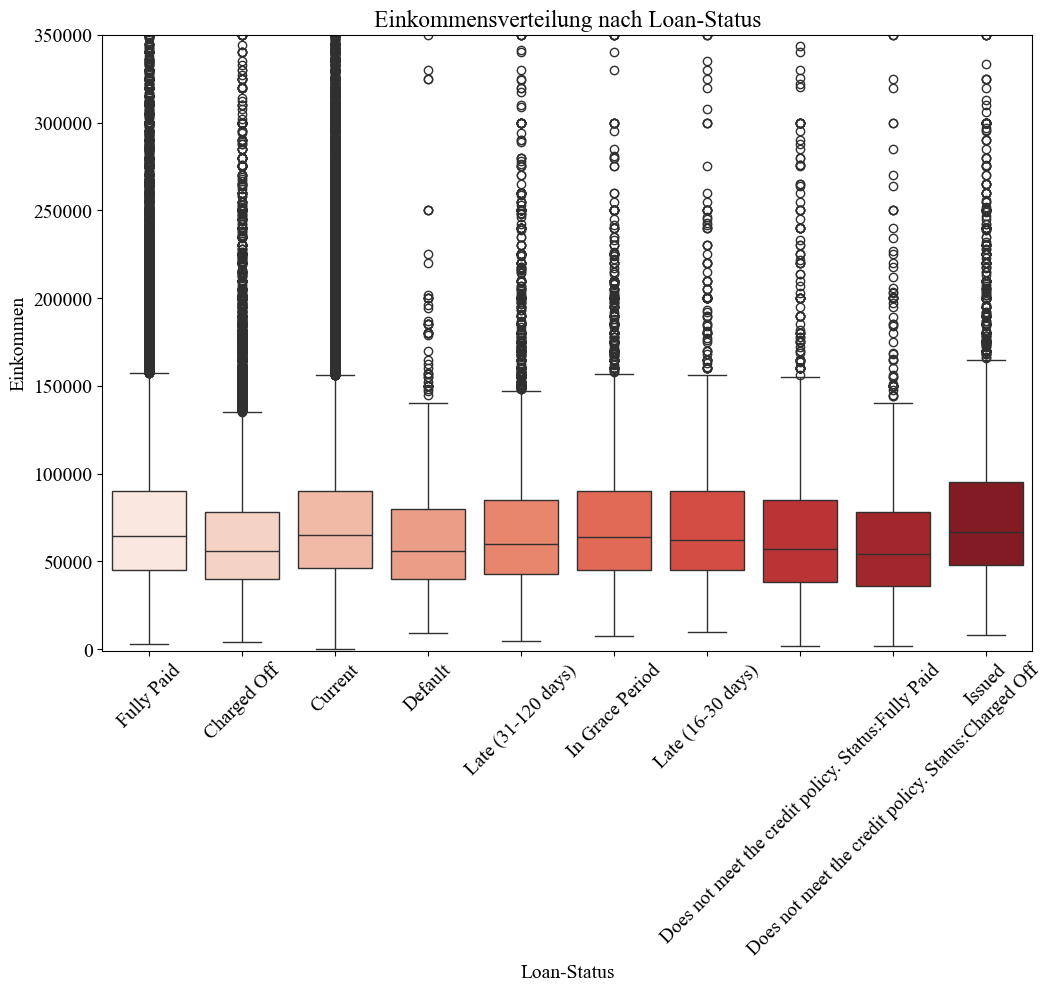

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# CSV-Daten einlesen
df = pd.read_csv('loan.csv')


# DataFrame vorbereiten (optional: falls bestimmte Bereinigung erforderlich ist)
df = df[['loan_status', 'annual_inc']]
# RobustScaler anwenden 
#scaler = RobustScaler() 
#df['annual_inc'] = scaler.fit_transform(['annual_inc'])
plt.rcParams.update({'font.size': 14, 'font.family': 'serif', 'font.serif': ['Times New Roman']})
# Boxplot erstellen
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='annual_inc', data=df, palette='Reds')
plt.ylim(-1000, 350000)
plt.xticks(rotation=45)
plt.title('Einkommensverteilung nach Loan-Status')
plt.xlabel('Loan-Status')
plt.ylabel('Einkommen')
plt.show()







C:\Users\timse\AppData\Local\Temp\ipykernel_3228\1569970362.py:7: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


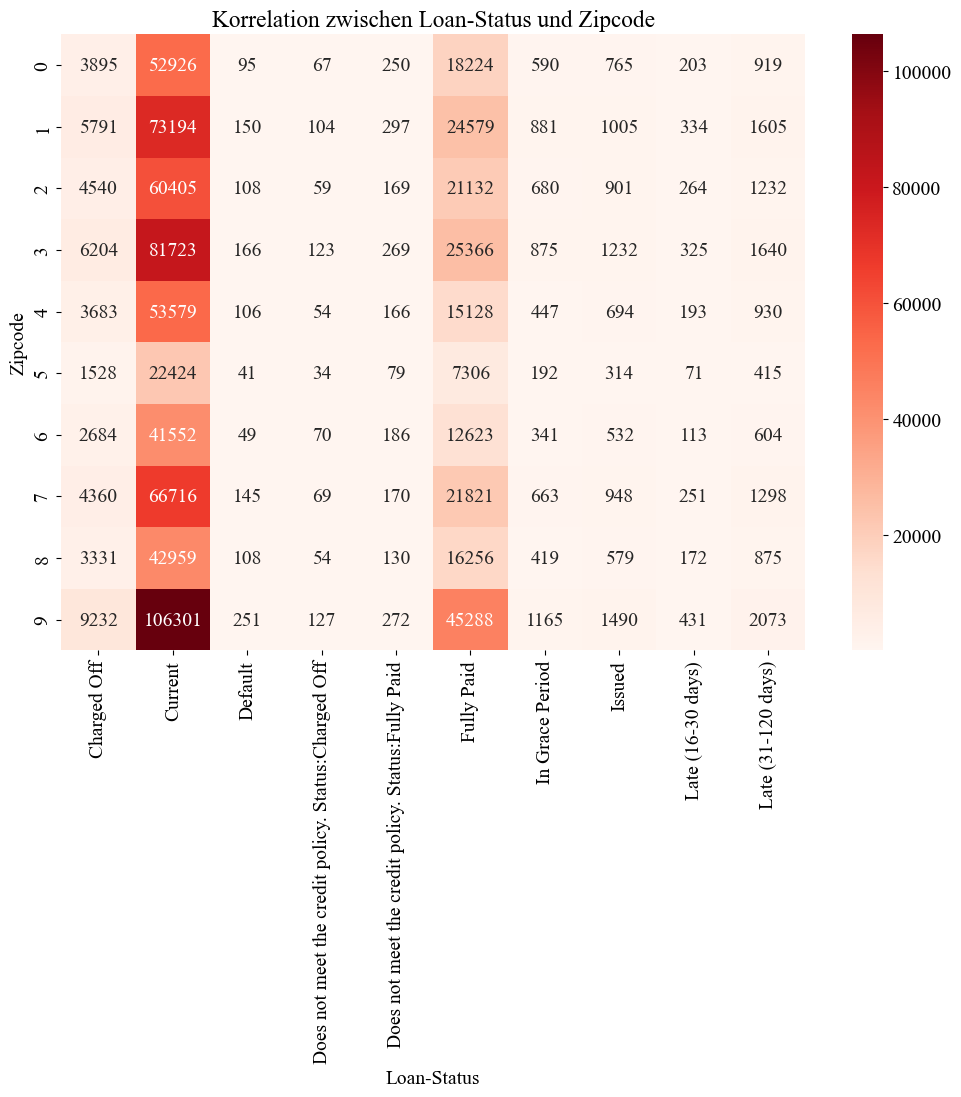

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# CSV-Daten einlesen
df = pd.read_csv('loan.csv')

# Entferne Buchstaben aus den Zipcodes
def extract_first_digit(text): 
    match = re.search(r'\d', text) 
    return match.group() if match else None

df['zip_code'] = df['zip_code'].apply(extract_first_digit)

# Daten nach Zipcode und Loan-Status gruppieren und zählen
df_grouped = df.groupby(['zip_code', 'loan_status']).size().unstack(fill_value=0)

# Heatmap erstellen
plt.figure(figsize=(12, 8))
sns.heatmap(df_grouped, annot=True, fmt='d', cmap='Reds')
plt.title('Korrelation zwischen Loan-Status und Zipcode')
plt.xlabel('Loan-Status')
plt.ylabel('Zipcode')
plt.show()


In [13]:
mapping_loan_status = {'Fully Paid':1, 'Charged Off':0, 'Current':1, 'Default':0, 'Late (31-120 days)':0, 'In Grace Period':0, 'Late (16-30 days)':0, 'Does not meet the credit policy. Status:Fully Paid':0, 'Does not meet the credit policy. Status:Charged Off':0, 'Issued':0}
df['loan_status'] = df['loan_status'].map(mapping_loan_status)
df['loan_status'].corr(df['annual_inc'])

np.float64(0.03061302047540106)

    'Fully Paid': 1 --> 'Vollständig bezahlt'

    'Charged Off': 2 --> 'Abgeschrieben'

    'Current': 3 --> 'Aktuell'

    'Default': 4 --> 'In Verzug'

    'Late (31-120 days)': 5 --> 'Verspätet (31-120 Tage)'

    'In Grace Period': 6 --> 'In der Schonfrist'

    'Late (16-30 days)': 7 --> 'Verspätet (16-30 Tage)'

    'Does not meet the credit policy. Status:Fully Paid': 8 --> 'Erfüllt die Kreditrichtlinien nicht. Status: Vollständig bezahlt'

    'Does not meet the credit policy. Status:Charged Off': 9 --> 'Erfüllt die Kreditrichtlinien nicht. Status: Abgeschrieben'

    'Issued': 10 --> 'Ausgestellt'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import pivot_table
import re


# Funktion zum Extrahieren der ersten Zahl
def extract_first_number(text):
    match = re.search(r'\d+', text)
    return int(match.group()) if match else None
def extract_first_digit(text): 
    match = re.search(r'\d', text) 
    return match.group() if match else None


# CSV-Daten einlesen
df = pd.read_csv('loan.csv')
df['zip_code'] = df['zip_code'].apply(extract_first_digit)
#loanstatus labelncoding
mapping_loan_status = {
 'Fully Paid':1, 'Charged Off':2, 'Current':3, 'Default':4, 'Late (31-120 days)':5,
 'In Grace Period':6, 'Late (16-30 days)':7,
 'Does not meet the credit policy. Status:Fully Paid':8,
 'Does not meet the credit policy. Status:Charged Off':9, 'Issued':10
}
df['loan_status'] = df['loan_status'].map(mapping_loan_status)
 

# Nur relevante Spalten auswählen
df = df[['', 'zip_code']]

# Fehlende Werte entfernen
#df = df.dropna()
# Fehlende Werte entfernen 
df = df.dropna(subset=['loan_status', 'zip_code']) 
# Loan Status und Zip Code zählen 
pivot_table = df.groupby(['zip_code', 'loan_status']).size().unstack(fill_value=0)
# Heatmap erstellen
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Reds', cbar=True)
# Selbstbestimmte Strings für die Achsen 
x_labels = ['Vollständig bezahlt', 'Abgeschrieben', 'Aktuell', 'In Verzug', 'Verspätet (31-120 Tage)', 'In der Schonfrist','Verspätet (16-30 Tage)', 'Erfüllt die Kreditrichtlinien nicht.\n Status: Vollständig bezahlt', 'Erfüllt die Kreditrichtlinien nicht.\n Status: Abgeschrieben', 'Ausgestellt']
#y_labels = ['12345', '67890', 'A123B', '45678', 'B7890'] 
# Achsenticks anpassen 
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45, ha='right') 
#plt.yticks(ticks=range(len(y_labels)), labels=y_labels, rotation=0)
plt.title('Loan Status nach Zip Code')
plt.xlabel('Loan Status')
plt.ylabel('Zip Code')
plt.show()

C:\Users\timse\AppData\Local\Temp\ipykernel_31712\2451205972.py:18: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


KeyError: ['loan_status']

nur die wichtigstenn klassen

In [ ]:
import matplotlib.pyplot as plt 
import pandas as p
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from sklearn.metrics import classification_report

# CSV-Daten einlesen
df = pd.read_csv('loan.csv')

# Datenbereinigung und -vorbereitung (dein vorheriger Code)
threshold = len(df) * 0.9
df = df.dropna(axis=1, thresh=threshold)
df = df.drop(columns=['id', 'member_id','emp_title','title','verification_status','url','addr_state','grade'])
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(0)
mean_tot_cur_bal = df['tot_cur_bal'].median()
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(mean_tot_cur_bal)
df['pub_rec'] = df['pub_rec'].fillna(0)
df['open_acc'] = df['open_acc'].fillna(0)
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(0)
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='mixed')
df['earliest_cr_line'] = df['earliest_cr_line'].dt.strftime('%m.%Y')
mean_annual_inc = df['annual_inc'].median()
df['annual_inc'] = df['annual_inc'].fillna(mean_annual_inc)
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(0)
df = df[~df['application_type'].str.contains('JOINT')]
df = df.drop(columns=['application_type'])
mapping_emp = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}
df['emp_length'] = df['emp_length'].map(mapping_emp)
mean_emp_length = df['emp_length'].median()
df['emp_length'] = df['emp_length'].fillna(mean_emp_length)
label_encoder = LabelEncoder() 
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
mean_revol_util = df['revol_util'].median()
df['revol_util'] = df['revol_util'].fillna(mean_revol_util)
mean_total_acc = df['total_acc'].median()
df['total_acc'] = df['total_acc'].fillna(mean_total_acc)
df = pd.get_dummies(df, columns=['pymnt_plan'], drop_first=False)
mapping_loan_status = {'Fully Paid':1, 'Charged Off':0, 'Current':1, 'Default':0, 'Late (31-120 days)':0, 'In Grace Period':0, 'Late (16-30 days)':0, 'Does not meet the credit policy. Status:Fully Paid':0, 'Does not meet the credit policy. Status:Charged Off':0, 'Issued':0}
df['loan_status'] = df['loan_status'].map(mapping_loan_status)
df = pd.get_dummies(df, columns=['term'], drop_first=False)
df = pd.get_dummies(df, columns=['purpose'], drop_first=False)
df['zip_code'] = df['zip_code'].str.replace(r'[a-zA-Z]', '', regex=True)
df['issue_d'] = pd.to_datetime(df['issue_d'], format='mixed')
df['issue_d'] = df['issue_d'].dt.strftime('%m.%Y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='mixed')
df['last_pymnt_d'] = df['last_pymnt_d'].dt.strftime('%m.%Y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='mixed')
df['last_credit_pull_d'] = df['last_credit_pull_d'].dt.strftime('%m.%Y')
label_encoder = LabelEncoder() 
df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])
df = pd.get_dummies(df, columns=['initial_list_status'], drop_first=False)
# Merkmale (Features) und Zielvariable (Target) definieren
X = df.drop(columns=['loan_status','term','policy_code','purpose','collections'])
y = df['loan_status']
#from sklearn import clf
# Feature Importances extrahieren
#importances = clf.feature_importances_
#indices = np.argsort(importances)[::-1]

# Merkmale sortieren
#features = X.columns

# Visualisierung der Feature Importances
#

# Daten in Trainings- und Testset aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Klassifikator erstellen und trainieren
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Vorhersagen auf dem Testset treffen
y_pred = clf.predict(X_test)

# Genauigkeit der Vorhersagen bewerten
accuracy = accuracy_score(y_test, y_pred)
print(f"\nGenauigkeit des Random Forest Klassifikators: {accuracy:.2f}")
# Matplotlib Font-Einstellungen ändern 
plt.rcParams.update({'font.size': 14, 'font.family': 'serif', 'font.serif': ['Times New Roman']})
# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Wahre Klasse')
plt.show()

# Vorhersagen auf dem Trainings- und Testset treffen
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Genauigkeit der Vorhersagen bewerten
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"\nGenauigkeit des Random Forest Klassifikators - Training: {accuracy_train:.2f}")
print(f"Genauigkeit des Random Forest Klassifikators - Test: {accuracy_test:.2f}")



report = classification_report(y_test, y_pred)
print(report)
#macro_avg = classification_report['macro avg']
#print(macro_avg)
# Merkmalswichtigkeit extrahieren 
importances = clf.feature_importances_ 
feature_names = X.columns 
# Visualisierung der Merkmalswichtigkeit 
indices = np.argsort(importances)[::-1] 
  # Setze die untere Grenze auf 1% und obere Grenze etwas höher als der maximale Wert
# Sortiere die Merkmale nach ihrer Wichtigkeit 
plt.figure(figsize=(10, 6)) 
plt.title('Wichtigkeit der Merkmale') 
plt.bar(range(X.shape[1]), importances[indices], align='center', color='r') 
plt.xticks(range(X.shape[1]), feature_names[indices],rotation=90) 
plt.xlabel('Merkmale') 
plt.ylabel('Wichtigkeit') 
plt.show()